c:\users\gitbleidd\appdata\local\programs\python\python39\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
<ipython-input-86-a1258605a087>:80: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(
c:\users\gitbleidd\appdata\local\programs\python\python39\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Found 597 images belonging to 36 classes.
Found 597 images belonging to 36 classes.


<ipython-input-86-a1258605a087>:92: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)


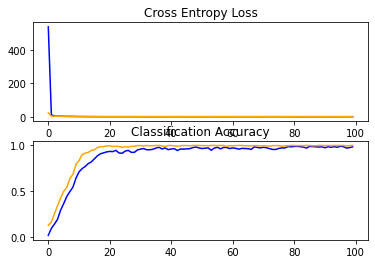

In [86]:
from matplotlib import pyplot
from matplotlib.image import imread

import keras
import sys

from keras.models import Sequential, load_model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.wrappers.scikit_learn import KerasClassifier

N = 64
train_it_indices = None

# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(N, N, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
#     model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
#     model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(rate=0.25))
    model.add(Flatten())
    model.add(Dense(36, activation='softmax'))
    
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.show()
    pyplot.close()

# run the test harness for evaluating a model
def run_test_harness():
    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(1.0/255.0)
    
    train_data_dir  = "C:\\Users\\gitbleidd\\Google Диск\\Colab Notebooks\\prepared_train_64"
    test_data_dir = "C:\\Users\\gitbleidd\\Google Диск\\Colab Notebooks\\prepared_test_64"

    # prepare iterators
    train_it = datagen.flow_from_directory(
        train_data_dir,
        class_mode='categorical', 
        batch_size=32,
        target_size=(N, N))
    
    test_it = datagen.flow_from_directory(
        train_data_dir,
        class_mode='categorical', 
        batch_size=32,
        target_size=(N, N))
    
    # fit model
    history = model.fit_generator(
        train_it, 
        steps_per_epoch=len(train_it),
        validation_data=test_it, 
        validation_steps=len(test_it), 
        epochs=100,
        verbose=0)
    
    # save model
    model.save('cnn_model.h5')
    
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    #rint('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
    
    return train_it.class_indices


train_it_indices = run_test_harness()

In [83]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(N, N))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, N, N, 3)
    img = img.astype('float32') * 1.0/255.0
    return img
 
# load an image and predict the class
def run_example():
    # load the image
    #img_path = "C:\\Users\\gitbleidd\\Google Диск\\Colab Notebooks\\prepared_test_64\\2\\2.png"
    img_path = "C:\\dev\\psu\\pattern-recognition\\PatternRecognition\\prepared_test_64\\3\\3.png"
    img = load_image(img_path)
    # load model
    model = load_model('cnn_model.h5')
    # predict the class
    result = model.predict(img)
    print(result)
    char_nums = [str(chr(i)) for i in range(ord('0'), ord('9') + 1)] + [str(chr(i)) for i in range(ord('A'), ord('Z') + 1)]
    index = np.argmax(result)
    print(index)
    print(char_nums[index])

run_example()

[[0.03259558 0.02701777 0.01547445 0.06448008 0.04794562 0.03576016
  0.01359985 0.023825   0.04099044 0.03111997 0.03735648 0.01839523
  0.02831679 0.03560393 0.01861923 0.01446316 0.02116949 0.01981539
  0.0238453  0.03784064 0.02589229 0.0247414  0.02123613 0.0338005
  0.05450012 0.01749641 0.02226339 0.01862172 0.0214303  0.01853046
  0.01779402 0.02274744 0.03185738 0.03938784 0.02543801 0.01602802]]
3
3


In [87]:
from sklearn.metrics import accuracy_score
datagen = ImageDataGenerator(rescale = 1. / 255)

test_data_dir = "C:\\Users\\gitbleidd\\Google Диск\\Colab Notebooks\\prepared_test_64"
test_batches = datagen.flow_from_directory(
    directory=test_data_dir,
    class_mode='categorical',
    batch_size=32,
    target_size=(N, N),
    shuffle=False)

model = load_model('cnn_model.h5')
predictions = model.predict(x=test_batches, verbose=0)

print(f'Accuracy = {round(accuracy_score(test_batches.classes, np.argmax(predictions, axis=-1)) * 100, 2)}%')

Found 531 images belonging to 36 classes.
Accuracy = 42.37%
